In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('SmokeBan.csv')
df.head()

,Unnamed: 0,smoker,ban,age,education,afam,hispanic,gender
0,1,yes,yes,41,hs,no,no,female
1,2,yes,yes,44,some college,no,no,female
2,3,no,no,19,some college,no,no,female
3,4,yes,no,29,hs,no,no,female
4,5,no,yes,28,some college,no,no,female


In [5]:
#Descriptive Analysis:

In [6]:
age_stats = df['age'].describe()
education_counts = df['education'].value_counts()
smoking_counts = df['smoker'].value_counts()

print("Age Summary Statistics:")
print(age_stats)
print("\nEducation Level Counts:")
print(education_counts)
print("\nSmoking Status Counts:")
print(smoking_counts)

smoking_distribution = df['smoker'].value_counts(normalize=True)
print("\nSmoking Distribution:")
print(smoking_distribution)

ban_proportion = df['ban'].value_counts(normalize=True)
print("\nProportion of Individuals Subject to Workplace Smoking Bans:")
print(ban_proportion)

Age Summary Statistics:
count    10000.000000
mean        38.693200
std         12.113783
min         18.000000
25%         29.000000
50%         37.000000
75%         47.000000
max         88.000000
Name: age, dtype: float64

Education Level Counts:
hs              3266
some college    2802
college         1972
master          1048
hs drop out      912
Name: education, dtype: int64

Smoking Status Counts:
no     7577
yes    2423
Name: smoker, dtype: int64

Smoking Distribution:
no     0.7577
yes    0.2423
Name: smoker, dtype: float64

Proportion of Individuals Subject to Workplace Smoking Bans:
yes    0.6098
no     0.3902
Name: ban, dtype: float64


In [7]:
#Smoking Behavior and Workplace Smoking Bans:

Chi-square test results:
Chi-square statistic: 77.53977705849606
p-value: 1.3007632329199822e-18


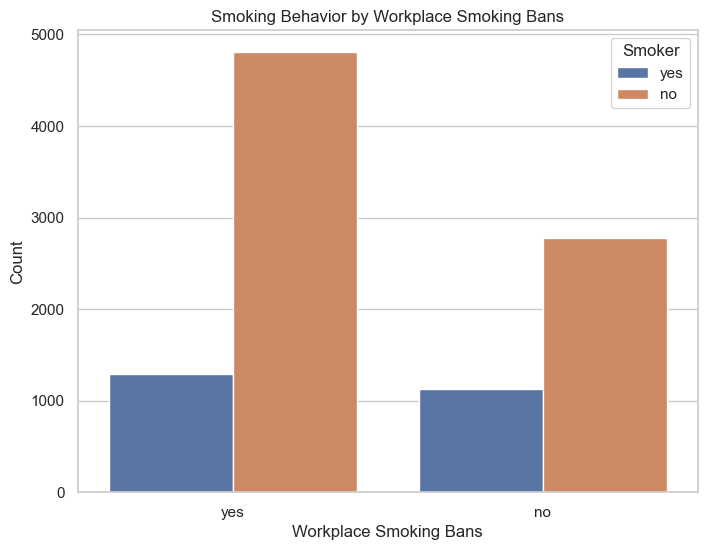

In [8]:
contingency_table = pd.crosstab(df['smoker'], df['ban'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ban', hue='smoker')
plt.title("Smoking Behavior by Workplace Smoking Bans")
plt.xlabel("Workplace Smoking Bans")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.show()

In [9]:
#Demographic Factors and Smoking Behavior:

Chi-square test results:
Chi-square statistic: 381.5904901963123
p-value: 0.15009246635984544


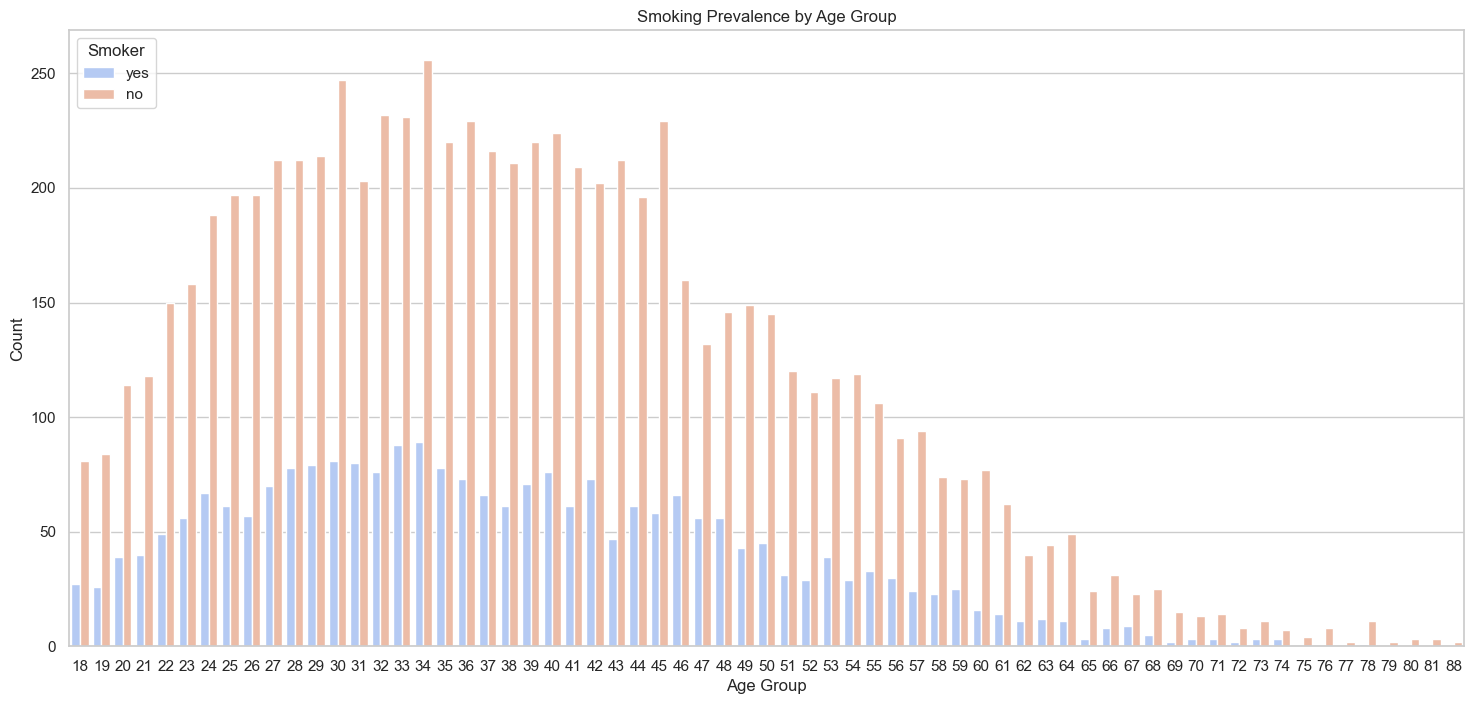

In [10]:
smoking_demographics = pd.crosstab([df['smoker']], [df['age'], df['gender'], df['afam'], df['hispanic']])

chi2, p_value, _, _ = chi2_contingency(smoking_demographics)

print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

sns.set(style="whitegrid")
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='age', hue='smoker', palette='coolwarm')
plt.title("Smoking Prevalence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Smoker")
plt.show()

In [11]:
#Education Level and Smoking Behavior:

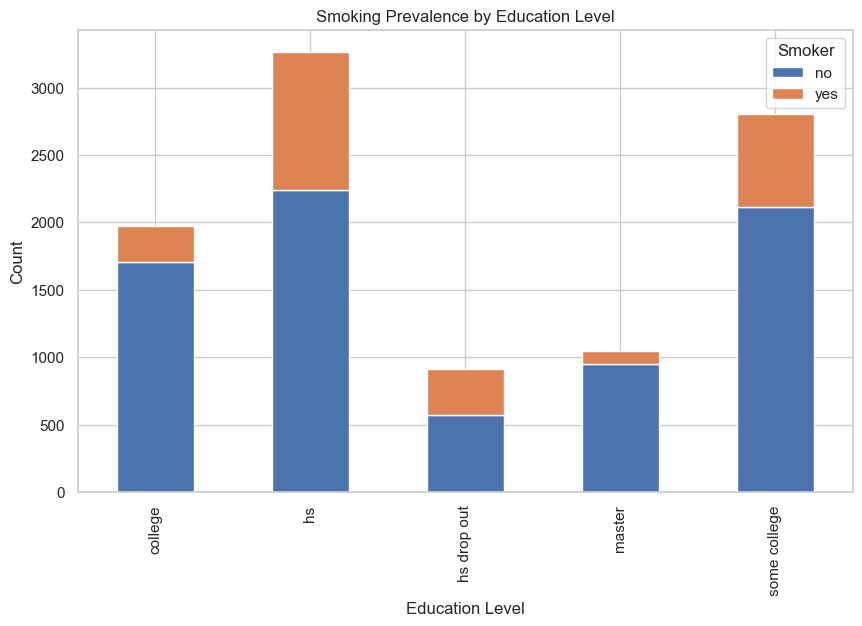

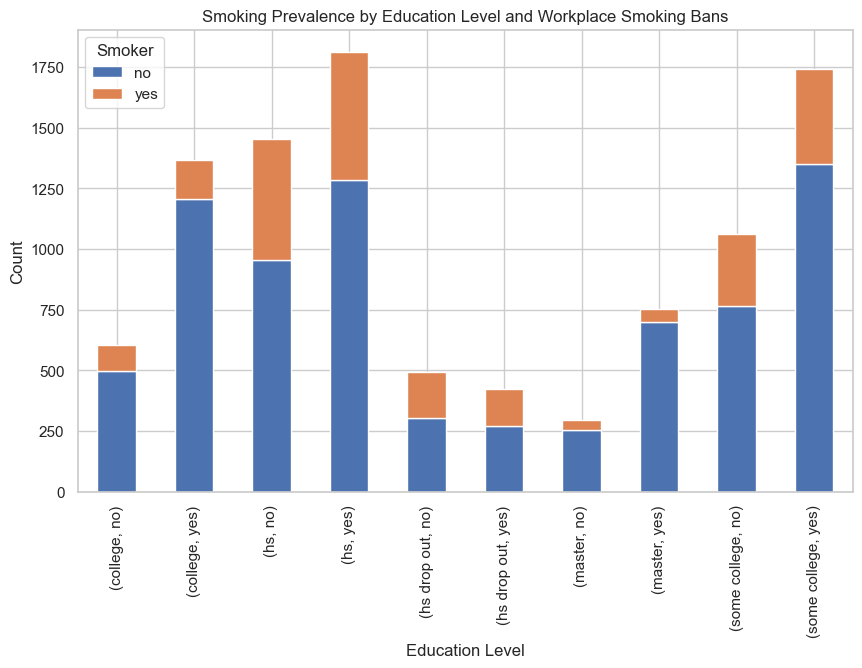

Chi-square test results for education and smoking:
Chi-square value: 430.5440532579541
p-value: 6.975046011690946e-92

Chi-square test results for education, workplace smoking bans, and smoking:
Chi-square value: 465.088506098672
p-value: 1.7021466730750655e-94


In [12]:
smoking_by_education = df.groupby(['education', 'smoker'])['smoker'].count().unstack()

smoking_by_education.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking Prevalence by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

smoking_by_education_ban = df.groupby(['education', 'ban', 'smoker'])['smoker'].count().unstack()


smoking_by_education_ban.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Smoking Prevalence by Education Level and Workplace Smoking Bans')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

education_smoker = pd.crosstab(df['education'], df['smoker'])
education_ban_smoker = pd.crosstab([df['education'], df['ban']], df['smoker'])

chi2, p_value, _, _ = chi2_contingency(education_smoker)
print('Chi-square test results for education and smoking:')
print(f'Chi-square value: {chi2}')
print(f'p-value: {p_value}')

chi2, p_value, _, _ = chi2_contingency(education_ban_smoker)
print('\nChi-square test results for education, workplace smoking bans, and smoking:')
print(f'Chi-square value: {chi2}')
print(f'p-value: {p_value}')